In [1]:
import numpy as np
import pandas as pd
import os
import joblib

In [2]:
random_state = 100

if not os.path.isdir("model_dumps"):
    os.makedirs("model_dumps")

## Data Loading

Set the filename here

In [3]:
CSV_FILENAME = "DROPPEDWITHATTRIBUTESNULL_recompiled_features_updated_yunet_pixels_bg_pixels_fixlbbox.csv" #<-- update csv name
df_features = pd.read_csv(CSV_FILENAME)
df_features.head()

,path,updated_source_h,updated_source_w,face_index,used_mask,R_BIN_mask_0,R_BIN_mask_1,R_BIN_mask_2,R_BIN_mask_3,R_BIN_mask_4,...,lbbox_area,e_face_yn,e_bbox_yn,e_lbbox_yn,pixels,bg_pixels,x,y,w,h
0,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,683,1024,75,True,0.0,0.0,0.0,0.0,0.0,...,0.001976,0.000,0.000,0.00,0.000324,0.000092,0.824519,0.508413,0.019231,0.021635
1,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,23,True,0.0,0.0,0.0,0.0,0.0,...,0.000953,0.000,0.000,0.00,0.000139,0.000064,0.284856,0.522837,0.012019,0.016827
2,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,21,True,0.0,0.0,0.0,0.0,0.0,...,0.002797,0.095,0.095,0.05,0.000468,0.000110,0.370192,0.449519,0.024038,0.024038
3,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,768,1024,1,True,0.0,0.0,0.0,0.0,0.0,...,0.000809,0.000,0.000,0.00,0.000087,0.000052,0.918269,0.612981,0.009615,0.014423
4,C:\Users\jayba\Documents\GitHub\THS-ST1\images...,683,1024,2,True,0.0,0.0,0.0,0.0,0.0,...,0.016838,0.215,0.215,0.15,0.003687,0.000300,0.602163,0.334135,0.055288,0.072115


```
df_features = df_features.drop(columns = ['Unnamed: 0', 'path', 'source_w', 'source_h', 'face_index'])
df_features = df_features.loc[df_features["e_bbox_yf"] < 3, :]
print(df_features.columns)
```

Change string types to numeric types

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()
categorical_columns = df_features.select_dtypes(include=[bool, object]).columns
encoded_columns = df_features[categorical_columns].apply(encoder.fit_transform)
encoded_columns

,path,used_mask,source_file
0,4787,1,11357
1,4788,1,11358
2,4789,1,11359
3,4790,1,11360
4,4791,1,11361
...,...,...,...
24036,10771,1,1124
24037,10772,1,1125
24038,10773,1,1126
24039,10774,1,1127


In [6]:
df_encoded_features = df_features.copy()
df_encoded_features[categorical_columns] = encoded_columns
df_encoded_features

,path,updated_source_h,updated_source_w,face_index,used_mask,R_BIN_mask_0,R_BIN_mask_1,R_BIN_mask_2,R_BIN_mask_3,R_BIN_mask_4,...,lbbox_area,e_face_yn,e_bbox_yn,e_lbbox_yn,pixels,bg_pixels,x,y,w,h
0,4787,683,1024,75,1,0.00000,0.0,0.000000,0.000000,0.000000,...,0.001976,0.000,0.000,0.000,0.000324,0.000092,0.824519,0.508413,0.019231,0.021635
1,4788,768,1024,23,1,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000953,0.000,0.000,0.000,0.000139,0.000064,0.284856,0.522837,0.012019,0.016827
2,4789,768,1024,21,1,0.00000,0.0,0.000000,0.000000,0.000000,...,0.002797,0.095,0.095,0.050,0.000468,0.000110,0.370192,0.449519,0.024038,0.024038
3,4790,768,1024,1,1,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000809,0.000,0.000,0.000,0.000087,0.000052,0.918269,0.612981,0.009615,0.014423
4,4791,683,1024,2,1,0.00000,0.0,0.000000,0.000000,0.000000,...,0.016838,0.215,0.215,0.150,0.003687,0.000300,0.602163,0.334135,0.055288,0.072115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,10771,233,191,0,1,0.00000,0.0,0.000000,0.242604,0.177515,...,0.822115,0.175,0.170,0.150,0.241870,0.029256,0.519231,0.574519,0.408654,0.663462
24037,10772,500,366,0,1,0.00000,0.0,0.000000,0.000000,0.000000,...,0.722015,0.130,0.130,0.135,0.192111,0.003276,0.518029,0.554087,0.367788,0.531250
24038,10773,337,286,0,1,0.22905,0.0,0.000000,0.000000,0.050279,...,0.870192,0.100,0.105,0.105,0.244302,0.010528,0.509615,0.450721,0.432692,0.588942
24039,10774,235,215,0,1,0.00000,0.0,0.106667,0.153333,0.273333,...,0.724864,0.135,0.140,0.140,0.173285,0.010823,0.474760,0.486779,0.362981,0.507212


Split into X and Y

In [7]:
feat_regions = ["bbox", "mask"]

color_channels = {
    "RGB": ("R_BIN_", "G_BIN_", "B_BIN_"),
    "HSV": ("H_HSV_BIN_", "S_HSV_BIN_", "V_HSV_BIN_"),
    "HSL": ("H_HSL_BIN_", "S_HSL_BIN_", "L_HSL_BIN_"),
    "LAB": ("L_LAB_BIN_", "A_LAB_BIN_", "B_LAB_BIN_"),
    "YCBCR": ("Y_BIN_", "CR_BIN_", "CB_BIN_"),
}

#labels = {"bbox": "e_bbox_yf", "mask": "e_face_yf"}
labels = {"mask": "e_bbox_yf", "bbox": "e_face_yf"} #<-- inverted

In [8]:
def get_features_and_label(color_space, region):
    features = ["w", "h", "x", "y"]
    for color_channel in color_channels[color_space]: 
        features += [color_channel + region + "_" + str(i) for i in range(26)]
    features += ["LBP_BIN_" + region + "_" + str(i) for i in range(26)]
    features += ["SOBELX_BIN_" + region + "_" + str(i) for i in range(20)]
    features += ["SOBELY_BIN_" + region + "_" + str(i) for i in range(20)]
    features += ["SOBEL_BIN_" + region + "_" + str(i) for i in range(20)]
    return features, labels[region]

In [9]:
from sklearn.model_selection import train_test_split
CHOSEN_COLOR_SPACE = "LAB" #<-- pick a colorspace
CHOSEN_REGION = "bbox"

features, _ = get_features_and_label(CHOSEN_COLOR_SPACE, CHOSEN_REGION)
label = "e_bbox_yf"
X_features =  df_encoded_features.loc[:,  features]
y_features = df_encoded_features.loc[:, label].values #<-- pick label

X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size = 0.2, random_state=random_state)

In [10]:
X_features.columns.tolist()

['w',
 'h',
 'x',
 'y',
 'L_LAB_BIN_bbox_0',
 'L_LAB_BIN_bbox_1',
 'L_LAB_BIN_bbox_2',
 'L_LAB_BIN_bbox_3',
 'L_LAB_BIN_bbox_4',
 'L_LAB_BIN_bbox_5',
 'L_LAB_BIN_bbox_6',
 'L_LAB_BIN_bbox_7',
 'L_LAB_BIN_bbox_8',
 'L_LAB_BIN_bbox_9',
 'L_LAB_BIN_bbox_10',
 'L_LAB_BIN_bbox_11',
 'L_LAB_BIN_bbox_12',
 'L_LAB_BIN_bbox_13',
 'L_LAB_BIN_bbox_14',
 'L_LAB_BIN_bbox_15',
 'L_LAB_BIN_bbox_16',
 'L_LAB_BIN_bbox_17',
 'L_LAB_BIN_bbox_18',
 'L_LAB_BIN_bbox_19',
 'L_LAB_BIN_bbox_20',
 'L_LAB_BIN_bbox_21',
 'L_LAB_BIN_bbox_22',
 'L_LAB_BIN_bbox_23',
 'L_LAB_BIN_bbox_24',
 'L_LAB_BIN_bbox_25',
 'A_LAB_BIN_bbox_0',
 'A_LAB_BIN_bbox_1',
 'A_LAB_BIN_bbox_2',
 'A_LAB_BIN_bbox_3',
 'A_LAB_BIN_bbox_4',
 'A_LAB_BIN_bbox_5',
 'A_LAB_BIN_bbox_6',
 'A_LAB_BIN_bbox_7',
 'A_LAB_BIN_bbox_8',
 'A_LAB_BIN_bbox_9',
 'A_LAB_BIN_bbox_10',
 'A_LAB_BIN_bbox_11',
 'A_LAB_BIN_bbox_12',
 'A_LAB_BIN_bbox_13',
 'A_LAB_BIN_bbox_14',
 'A_LAB_BIN_bbox_15',
 'A_LAB_BIN_bbox_16',
 'A_LAB_BIN_bbox_17',
 'A_LAB_BIN_bbox_18',
 'A_LA

In [11]:
features

['w',
 'h',
 'x',
 'y',
 'L_LAB_BIN_bbox_0',
 'L_LAB_BIN_bbox_1',
 'L_LAB_BIN_bbox_2',
 'L_LAB_BIN_bbox_3',
 'L_LAB_BIN_bbox_4',
 'L_LAB_BIN_bbox_5',
 'L_LAB_BIN_bbox_6',
 'L_LAB_BIN_bbox_7',
 'L_LAB_BIN_bbox_8',
 'L_LAB_BIN_bbox_9',
 'L_LAB_BIN_bbox_10',
 'L_LAB_BIN_bbox_11',
 'L_LAB_BIN_bbox_12',
 'L_LAB_BIN_bbox_13',
 'L_LAB_BIN_bbox_14',
 'L_LAB_BIN_bbox_15',
 'L_LAB_BIN_bbox_16',
 'L_LAB_BIN_bbox_17',
 'L_LAB_BIN_bbox_18',
 'L_LAB_BIN_bbox_19',
 'L_LAB_BIN_bbox_20',
 'L_LAB_BIN_bbox_21',
 'L_LAB_BIN_bbox_22',
 'L_LAB_BIN_bbox_23',
 'L_LAB_BIN_bbox_24',
 'L_LAB_BIN_bbox_25',
 'A_LAB_BIN_bbox_0',
 'A_LAB_BIN_bbox_1',
 'A_LAB_BIN_bbox_2',
 'A_LAB_BIN_bbox_3',
 'A_LAB_BIN_bbox_4',
 'A_LAB_BIN_bbox_5',
 'A_LAB_BIN_bbox_6',
 'A_LAB_BIN_bbox_7',
 'A_LAB_BIN_bbox_8',
 'A_LAB_BIN_bbox_9',
 'A_LAB_BIN_bbox_10',
 'A_LAB_BIN_bbox_11',
 'A_LAB_BIN_bbox_12',
 'A_LAB_BIN_bbox_13',
 'A_LAB_BIN_bbox_14',
 'A_LAB_BIN_bbox_15',
 'A_LAB_BIN_bbox_16',
 'A_LAB_BIN_bbox_17',
 'A_LAB_BIN_bbox_18',
 'A_LA

## Load Model

In [12]:
# TODO: LOAD MODEL HERE
from sklearn.base import clone as clone_model

model = joblib.load("models/mpr_tunedfs_bo_LAB_bbox_e_bbox_yf.pkl")

In [13]:
model

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('selector',
                                         SelectKBest(score_func=<function f_regression at 0x000001C0B7366AF0>)),
                                        ('mpr',
                                         MLPRegressor(hidden_layer_sizes=(113,
                                                                          75,
                                                                          50),
                                                      random_state=100))]),
              n_iter=76, n_jobs=-1, random_state=100,
              search_spaces={'mpr__activation': Categorical(categories=('identity', 'logistic', 'tanh', 'relu'), prior=None),
                             'mpr__alph...
                             'mpr__shuffle': Categorical(categories=(False, True), prior=None),
                             'mpr__solver': Categorical(categories=('lbfgs', 'adam', 'sgd'), prior=None),
                             

## SHAP

In [14]:
import shap

In [15]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
# shap_values = explainer.shap_values(X_test)

Permutation explainer: 4810it [10:57,  7.23it/s]                                                                       


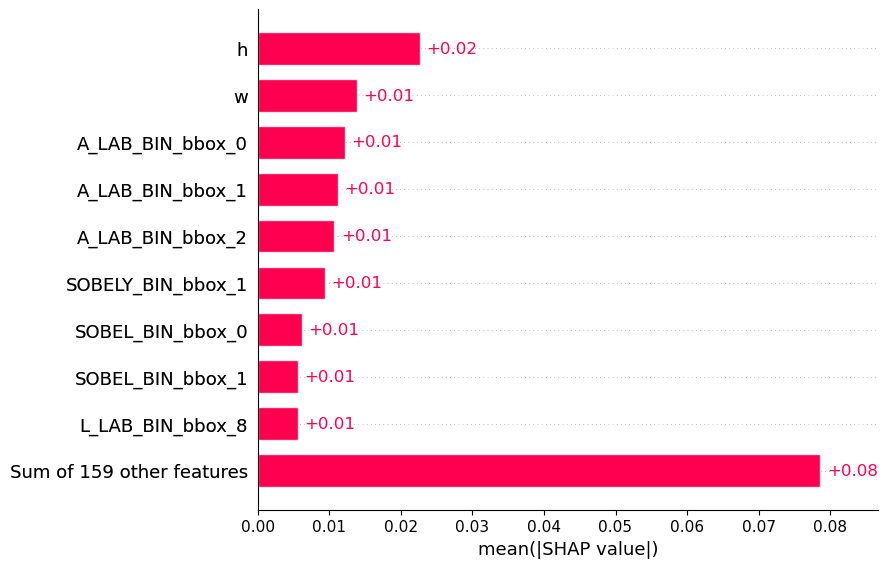

In [16]:
shap.plots.bar(shap_values)

## Grouped Shap Values

In [33]:
for i in X_test.columns:
    print(i)

w
h
x
y
L_LAB_BIN_bbox_0
L_LAB_BIN_bbox_1
L_LAB_BIN_bbox_2
L_LAB_BIN_bbox_3
L_LAB_BIN_bbox_4
L_LAB_BIN_bbox_5
L_LAB_BIN_bbox_6
L_LAB_BIN_bbox_7
L_LAB_BIN_bbox_8
L_LAB_BIN_bbox_9
L_LAB_BIN_bbox_10
L_LAB_BIN_bbox_11
L_LAB_BIN_bbox_12
L_LAB_BIN_bbox_13
L_LAB_BIN_bbox_14
L_LAB_BIN_bbox_15
L_LAB_BIN_bbox_16
L_LAB_BIN_bbox_17
L_LAB_BIN_bbox_18
L_LAB_BIN_bbox_19
L_LAB_BIN_bbox_20
L_LAB_BIN_bbox_21
L_LAB_BIN_bbox_22
L_LAB_BIN_bbox_23
L_LAB_BIN_bbox_24
L_LAB_BIN_bbox_25
A_LAB_BIN_bbox_0
A_LAB_BIN_bbox_1
A_LAB_BIN_bbox_2
A_LAB_BIN_bbox_3
A_LAB_BIN_bbox_4
A_LAB_BIN_bbox_5
A_LAB_BIN_bbox_6
A_LAB_BIN_bbox_7
A_LAB_BIN_bbox_8
A_LAB_BIN_bbox_9
A_LAB_BIN_bbox_10
A_LAB_BIN_bbox_11
A_LAB_BIN_bbox_12
A_LAB_BIN_bbox_13
A_LAB_BIN_bbox_14
A_LAB_BIN_bbox_15
A_LAB_BIN_bbox_16
A_LAB_BIN_bbox_17
A_LAB_BIN_bbox_18
A_LAB_BIN_bbox_19
A_LAB_BIN_bbox_20
A_LAB_BIN_bbox_21
A_LAB_BIN_bbox_22
A_LAB_BIN_bbox_23
A_LAB_BIN_bbox_24
A_LAB_BIN_bbox_25
B_LAB_BIN_bbox_0
B_LAB_BIN_bbox_1
B_LAB_BIN_bbox_2
B_LAB_BIN_bbox_3
B_LAB_BI

In [34]:
def group_shap_features(color_space, region):
    yolo = ["w", "h", "x", "y"]
    color = []
    for color_channel in color_channels[color_space]: 
        color.append([color_channel + region + "_" + str(i) for i in range(26)])
    lbp = ["LBP_BIN_" + region + "_" + str(i) for i in range(26)]
    sobel_x = ["SOBELX_BIN_" + region + "_" + str(i) for i in range(20)]
    sobel_y = ["SOBELY_BIN_" + region + "_" + str(i) for i in range(20)]
    sobel = ["SOBEL_BIN_" + region + "_" + str(i) for i in range(20)]
    return (yolo, *color, lbp, sobel_x, sobel_y, sobel)

In [35]:
groups = {}
groups['XYWH'] = []
groups['LAB_L'] = []
groups['LAB_A'] = []
groups['LAB_B'] = []
groups['LBP'] = []
groups['Sobel_X'] = []
groups['Sobel_Y'] = []
groups['Sobel'] = []

groups['XYWH'], groups['LAB_L'], groups['LAB_A'], groups['LAB_B'], groups['LBP'], groups['Sobel_X'], groups['Sobel_Y'], groups['Sobel'] = group_shap_features(CHOSEN_COLOR_SPACE, CHOSEN_REGION)
groups['X'] = groups['XYWH'][0]
groups['Y'] = groups['XYWH'][1]
groups['W'] = groups['XYWH'][2]
groups['H'] = groups['XYWH'][3]
groups.pop('XYWH')

['w', 'h', 'x', 'y']

In [36]:
groups

{'LAB_L': ['L_LAB_BIN_bbox_0',
  'L_LAB_BIN_bbox_1',
  'L_LAB_BIN_bbox_2',
  'L_LAB_BIN_bbox_3',
  'L_LAB_BIN_bbox_4',
  'L_LAB_BIN_bbox_5',
  'L_LAB_BIN_bbox_6',
  'L_LAB_BIN_bbox_7',
  'L_LAB_BIN_bbox_8',
  'L_LAB_BIN_bbox_9',
  'L_LAB_BIN_bbox_10',
  'L_LAB_BIN_bbox_11',
  'L_LAB_BIN_bbox_12',
  'L_LAB_BIN_bbox_13',
  'L_LAB_BIN_bbox_14',
  'L_LAB_BIN_bbox_15',
  'L_LAB_BIN_bbox_16',
  'L_LAB_BIN_bbox_17',
  'L_LAB_BIN_bbox_18',
  'L_LAB_BIN_bbox_19',
  'L_LAB_BIN_bbox_20',
  'L_LAB_BIN_bbox_21',
  'L_LAB_BIN_bbox_22',
  'L_LAB_BIN_bbox_23',
  'L_LAB_BIN_bbox_24',
  'L_LAB_BIN_bbox_25'],
 'LAB_A': ['A_LAB_BIN_bbox_0',
  'A_LAB_BIN_bbox_1',
  'A_LAB_BIN_bbox_2',
  'A_LAB_BIN_bbox_3',
  'A_LAB_BIN_bbox_4',
  'A_LAB_BIN_bbox_5',
  'A_LAB_BIN_bbox_6',
  'A_LAB_BIN_bbox_7',
  'A_LAB_BIN_bbox_8',
  'A_LAB_BIN_bbox_9',
  'A_LAB_BIN_bbox_10',
  'A_LAB_BIN_bbox_11',
  'A_LAB_BIN_bbox_12',
  'A_LAB_BIN_bbox_13',
  'A_LAB_BIN_bbox_14',
  'A_LAB_BIN_bbox_15',
  'A_LAB_BIN_bbox_16',
  'A_LAB_BIN

In [37]:
df_data = pd.DataFrame()
df_values = pd.DataFrame()
for dict_idx, dict_item in groups.items():
    counter = 0
    for item in dict_item:
        counter += 1
        idx = X_test.columns.get_loc(item)
#         print(item, idx)
        if counter == 1:
            df_data[dict_idx] = shap_values.data[:, idx]
            df_values[dict_idx] = shap_values.values[:, idx]
        else:
            df_data[dict_idx] += shap_values.data[:, idx]
            df_values[dict_idx] += shap_values.values[:, idx]

In [38]:
aggregates = shap.Explanation(df_values.to_numpy(), base_values=shap_values.base_values, data=df_data.to_numpy(), feature_names=df_data.columns.tolist())

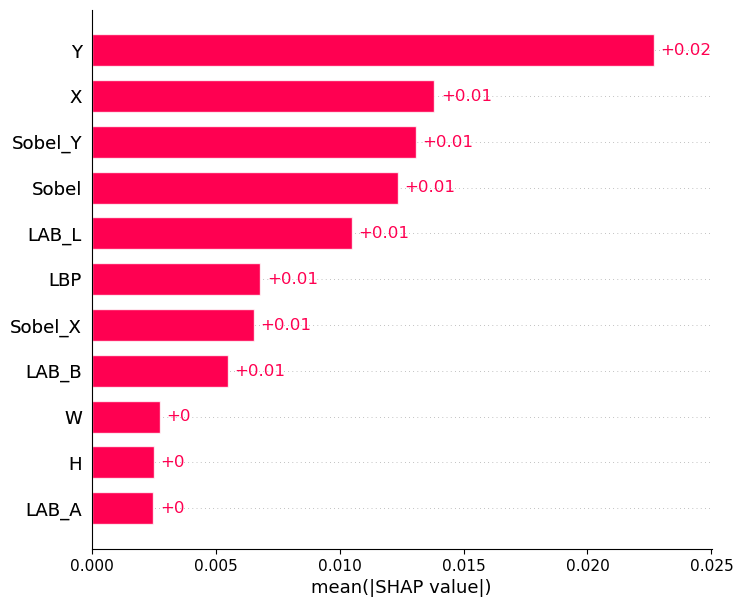

In [41]:
shap.plots.bar(aggregates, max_display=18)

## Directional Impact

In [42]:
for x, y in enumerate(shap_values.feature_names):
    print(x, y)

0 w
1 h
2 x
3 y
4 L_LAB_BIN_bbox_0
5 L_LAB_BIN_bbox_1
6 L_LAB_BIN_bbox_2
7 L_LAB_BIN_bbox_3
8 L_LAB_BIN_bbox_4
9 L_LAB_BIN_bbox_5
10 L_LAB_BIN_bbox_6
11 L_LAB_BIN_bbox_7
12 L_LAB_BIN_bbox_8
13 L_LAB_BIN_bbox_9
14 L_LAB_BIN_bbox_10
15 L_LAB_BIN_bbox_11
16 L_LAB_BIN_bbox_12
17 L_LAB_BIN_bbox_13
18 L_LAB_BIN_bbox_14
19 L_LAB_BIN_bbox_15
20 L_LAB_BIN_bbox_16
21 L_LAB_BIN_bbox_17
22 L_LAB_BIN_bbox_18
23 L_LAB_BIN_bbox_19
24 L_LAB_BIN_bbox_20
25 L_LAB_BIN_bbox_21
26 L_LAB_BIN_bbox_22
27 L_LAB_BIN_bbox_23
28 L_LAB_BIN_bbox_24
29 L_LAB_BIN_bbox_25
30 A_LAB_BIN_bbox_0
31 A_LAB_BIN_bbox_1
32 A_LAB_BIN_bbox_2
33 A_LAB_BIN_bbox_3
34 A_LAB_BIN_bbox_4
35 A_LAB_BIN_bbox_5
36 A_LAB_BIN_bbox_6
37 A_LAB_BIN_bbox_7
38 A_LAB_BIN_bbox_8
39 A_LAB_BIN_bbox_9
40 A_LAB_BIN_bbox_10
41 A_LAB_BIN_bbox_11
42 A_LAB_BIN_bbox_12
43 A_LAB_BIN_bbox_13
44 A_LAB_BIN_bbox_14
45 A_LAB_BIN_bbox_15
46 A_LAB_BIN_bbox_16
47 A_LAB_BIN_bbox_17
48 A_LAB_BIN_bbox_18
49 A_LAB_BIN_bbox_19
50 A_LAB_BIN_bbox_20
51 A_LAB_BIN_bbox_21
52

In [43]:
feat_names = {}
feat_names['XYWH'] = ['X', 'Y', 'W', 'H']
feat_names['LAB_L'] = []
feat_names['LAB_A'] = []
feat_names['LAB_B'] = []
feat_names['LBP'] = []
feat_names['Sobel_X'] = []
feat_names['Sobel_Y'] = []
feat_names['Sobel'] = []

for i in range(26):
    feat_names['LAB_L'].append('LAB L ' + str(i) )
    feat_names['LAB_A'].append('LAB A ' + str(i) )
    feat_names['LAB_B'].append('LAB B ' + str(i) )
    feat_names['LBP'].append('LBP ' + str(i) )

for i in range(20):
    feat_names['Sobel_X'].append('Sobel X ' + str(i) )
    feat_names['Sobel_Y'].append('Sobel Y ' + str(i) )
    feat_names['Sobel'].append('Sobel ' + str(i) )

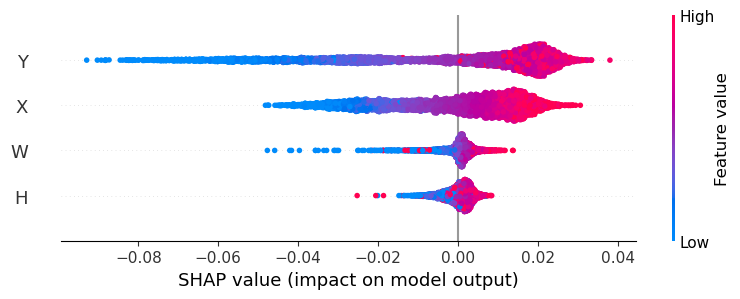

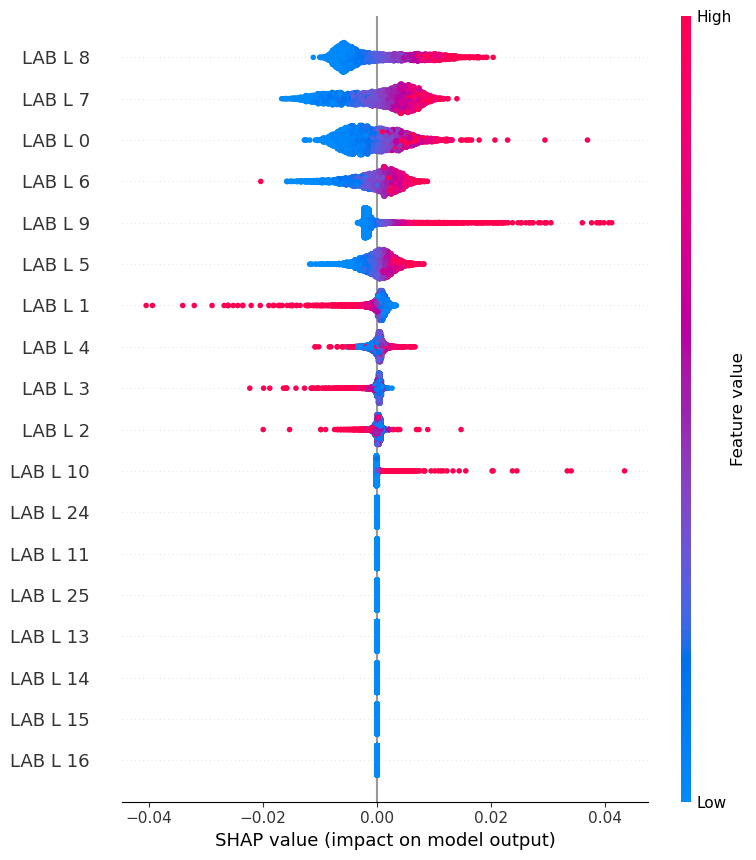

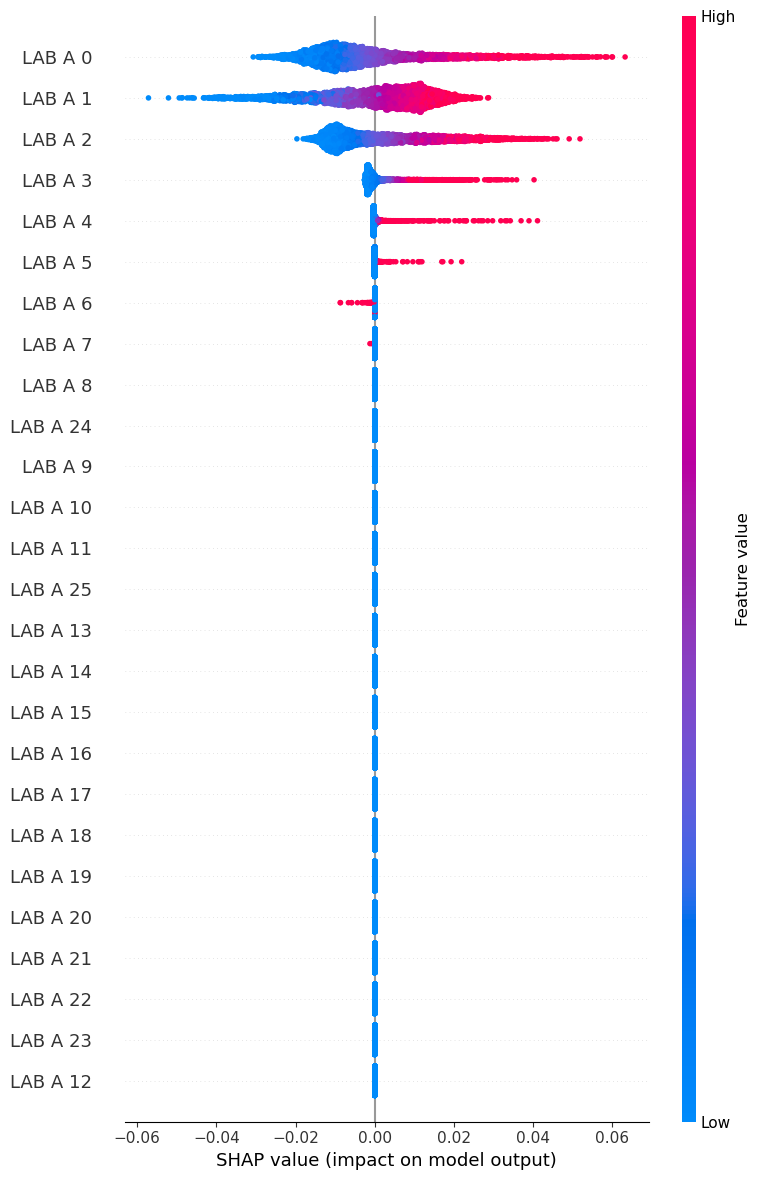

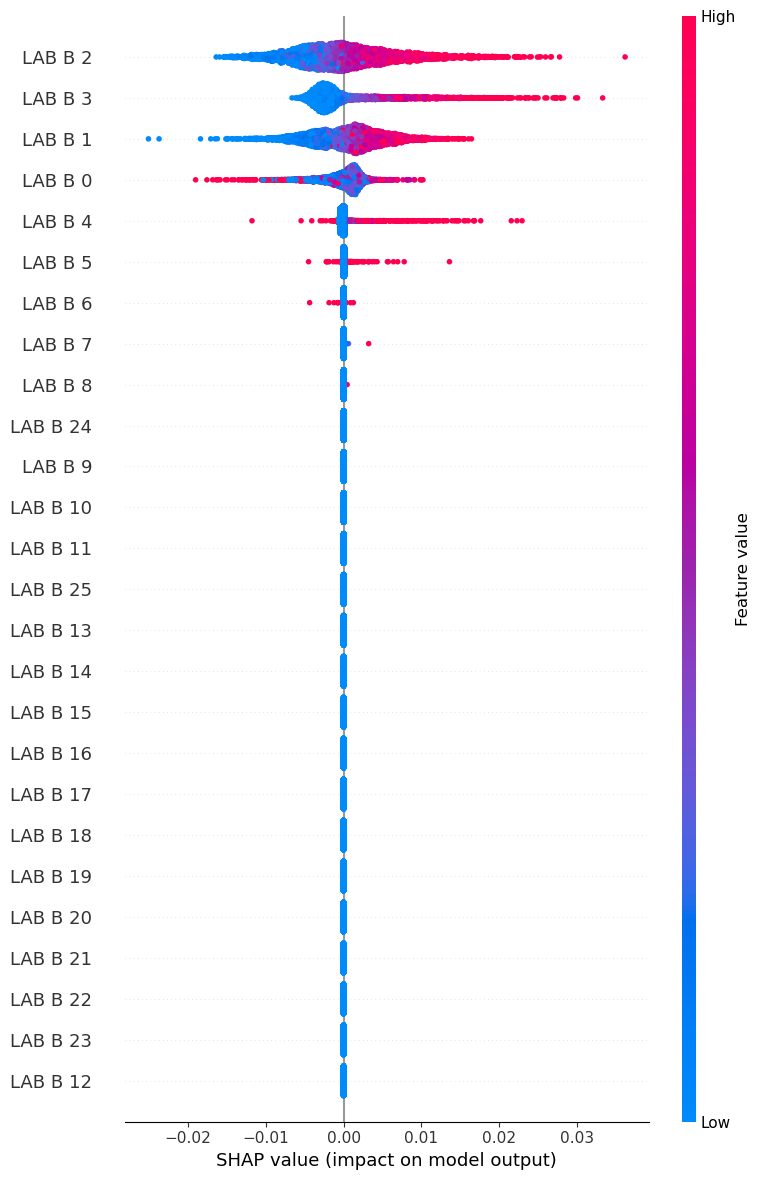

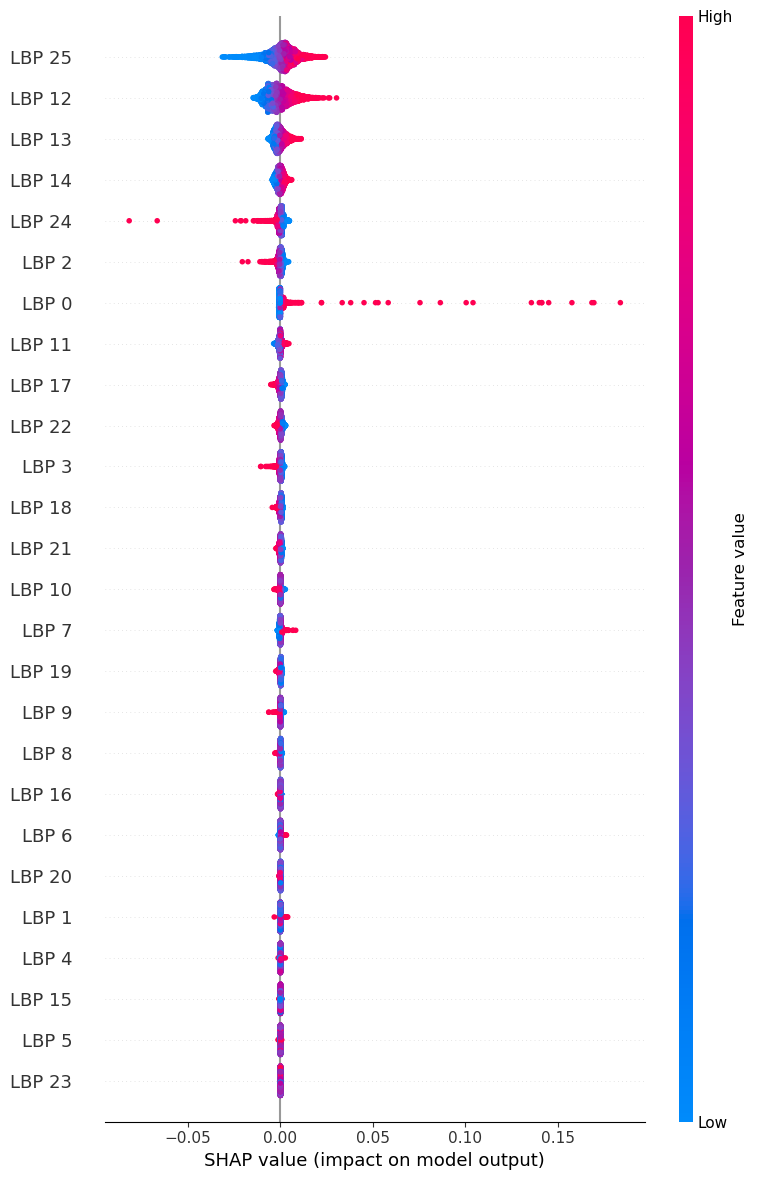

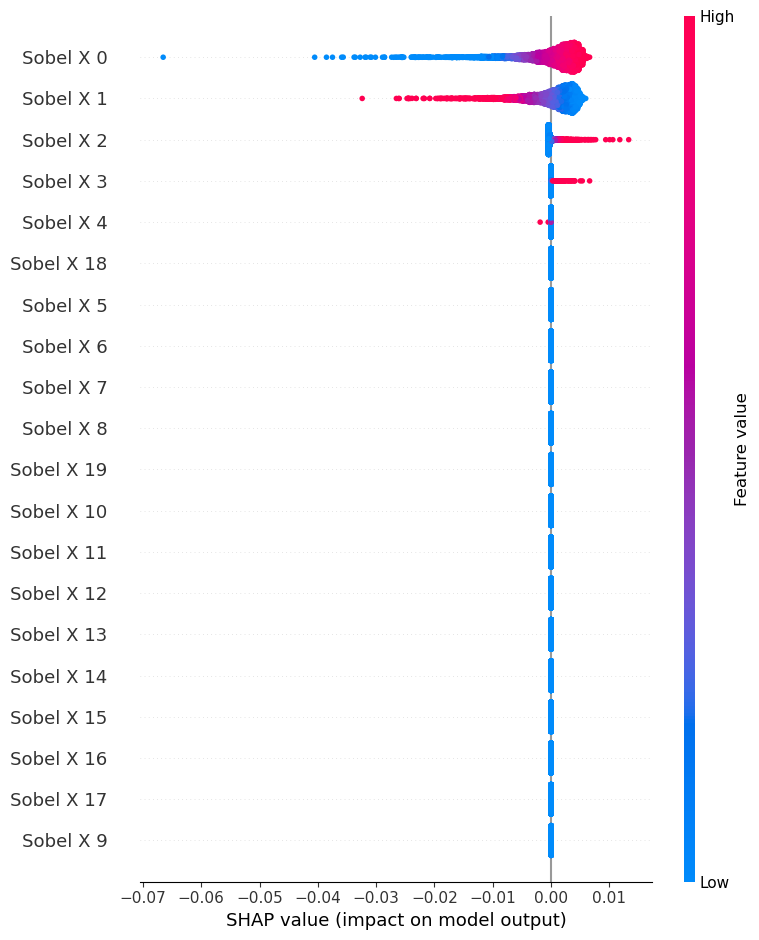

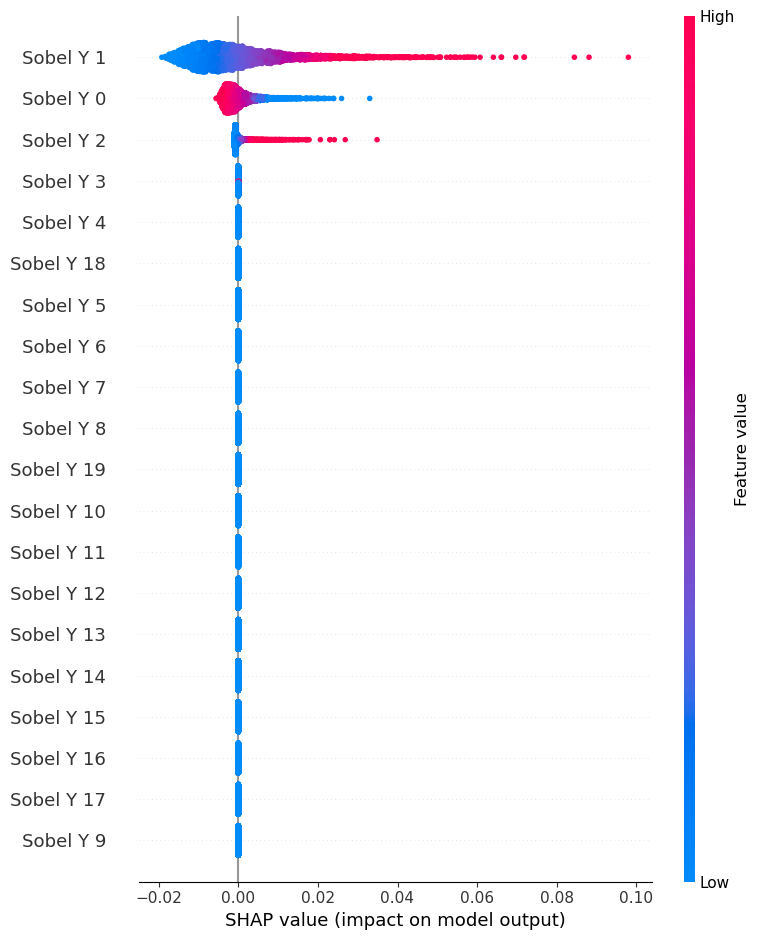

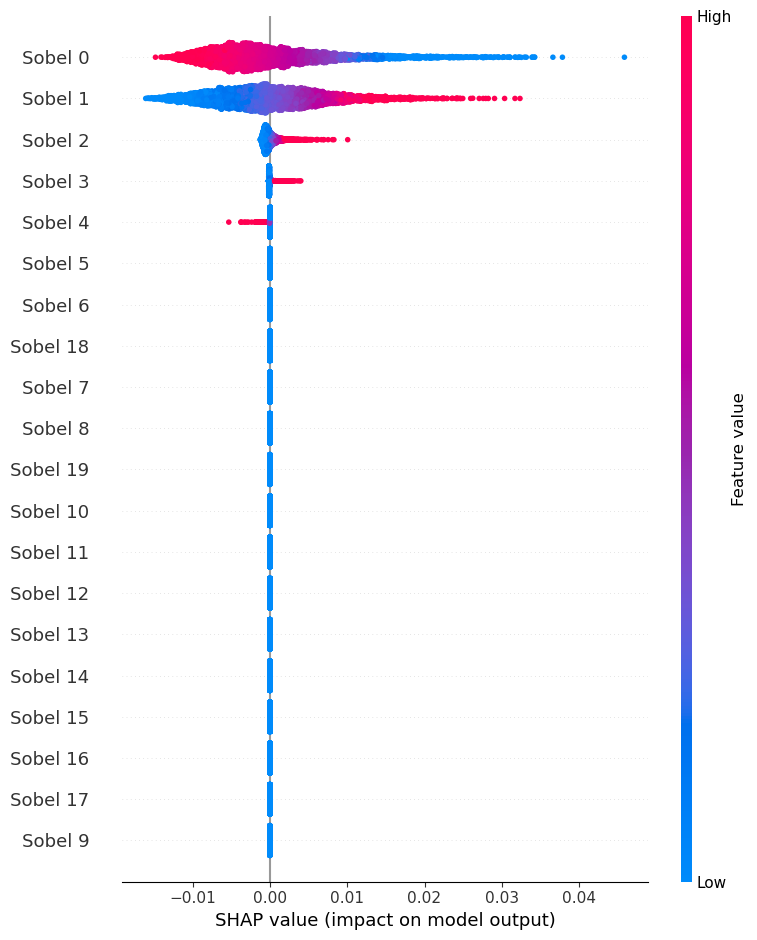

In [45]:
shap.summary_plot(shap_values[:, 0:4], feature_names=feat_names['XYWH'], max_display=18)
shap.summary_plot(shap_values[:, 4:30], feature_names=feat_names['LAB_L'], max_display=18)
shap.summary_plot(shap_values[:, 30:56], feature_names=feat_names['LAB_A'], max_display=26)
shap.summary_plot(shap_values[:, 56:82], feature_names=feat_names['LAB_B'], max_display=26)
shap.summary_plot(shap_values[:, 82:108], feature_names=feat_names['LBP'], max_display=26)
shap.summary_plot(shap_values[:, 108:128], feature_names=feat_names['Sobel_X'], max_display=20)
shap.summary_plot(shap_values[:, 128:148], feature_names=feat_names['Sobel_Y'], max_display=20)
shap.summary_plot(shap_values[:, 148:168], feature_names=feat_names['Sobel'], max_display=20)

In [26]:
shap_values[:, 108:128].shape

(4809, 20)